Question 4 : Analyze venue switchig between exchanges

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2023-12-10_to_2024-03-09.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2023-12-10_to_2024-03-09.csv

Data separation complete!
Spot exchanges: ['Binance' 'Bitfinex' 'Bybit' 'Coinbase' 'Kraken' 'OKX']
Futures exchanges: ['Binance' 'BingX' 'Bitfinex' 'Bitget' 'Bitmex' 'Bybit' 'CoinEx'
 'Coinbase' 'Deribit' 'HTX' 'Kraken' 'OKX']
Created spot dataframe for Binance with 91 rows
Created spot dataframe for Bitfinex with 91 rows
Created spot dataframe for Bybit with 91 rows
Created spot dataframe for Coinbase with 91 rows
Created spot dataframe for Kraken with 91 rows
Created spot dataframe for OKX with 91 rows
Created futures dat

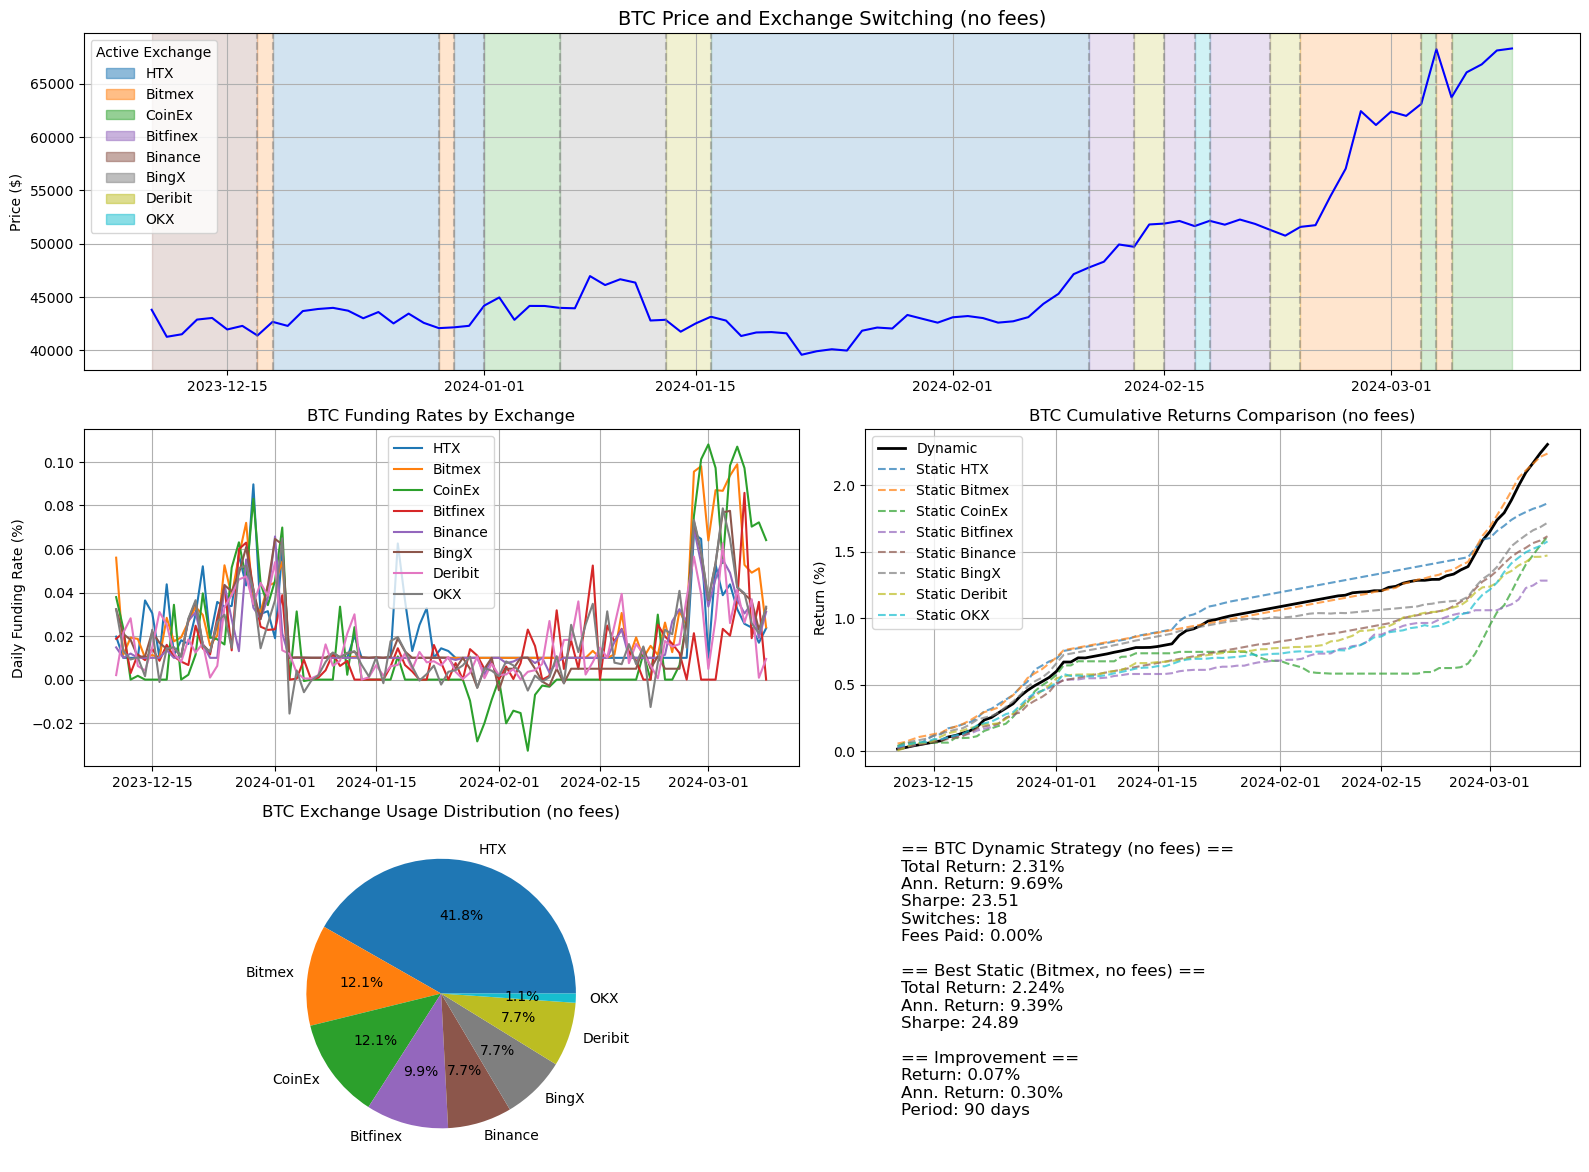

Spot exchanges: ['Binance' 'Bitfinex' 'Bybit' 'Coinbase' 'Kraken' 'OKX']
Futures exchanges: ['Binance' 'BingX' 'Bitfinex' 'Bitget' 'Bitmex' 'Bybit' 'CoinEx'
 'Coinbase' 'Deribit' 'HTX' 'Kraken' 'OKX']
Created spot dataframe for Binance with 91 rows
Created spot dataframe for Bitfinex with 91 rows
Created spot dataframe for Bybit with 91 rows
Created spot dataframe for Coinbase with 91 rows
Created spot dataframe for Kraken with 91 rows
Created spot dataframe for OKX with 91 rows
Created futures dataframe for Binance with 91 rows
Created futures dataframe for BingX with 91 rows
Created futures dataframe for Bitfinex with 91 rows
Created futures dataframe for Bitget with 91 rows
Created futures dataframe for Bitmex with 91 rows
Created futures dataframe for Bybit with 91 rows
Created futures dataframe for CoinEx with 91 rows
Created futures dataframe for Coinbase with 91 rows
Created futures dataframe for Deribit with 91 rows
Created futures dataframe for HTX with 91 rows
Created futures

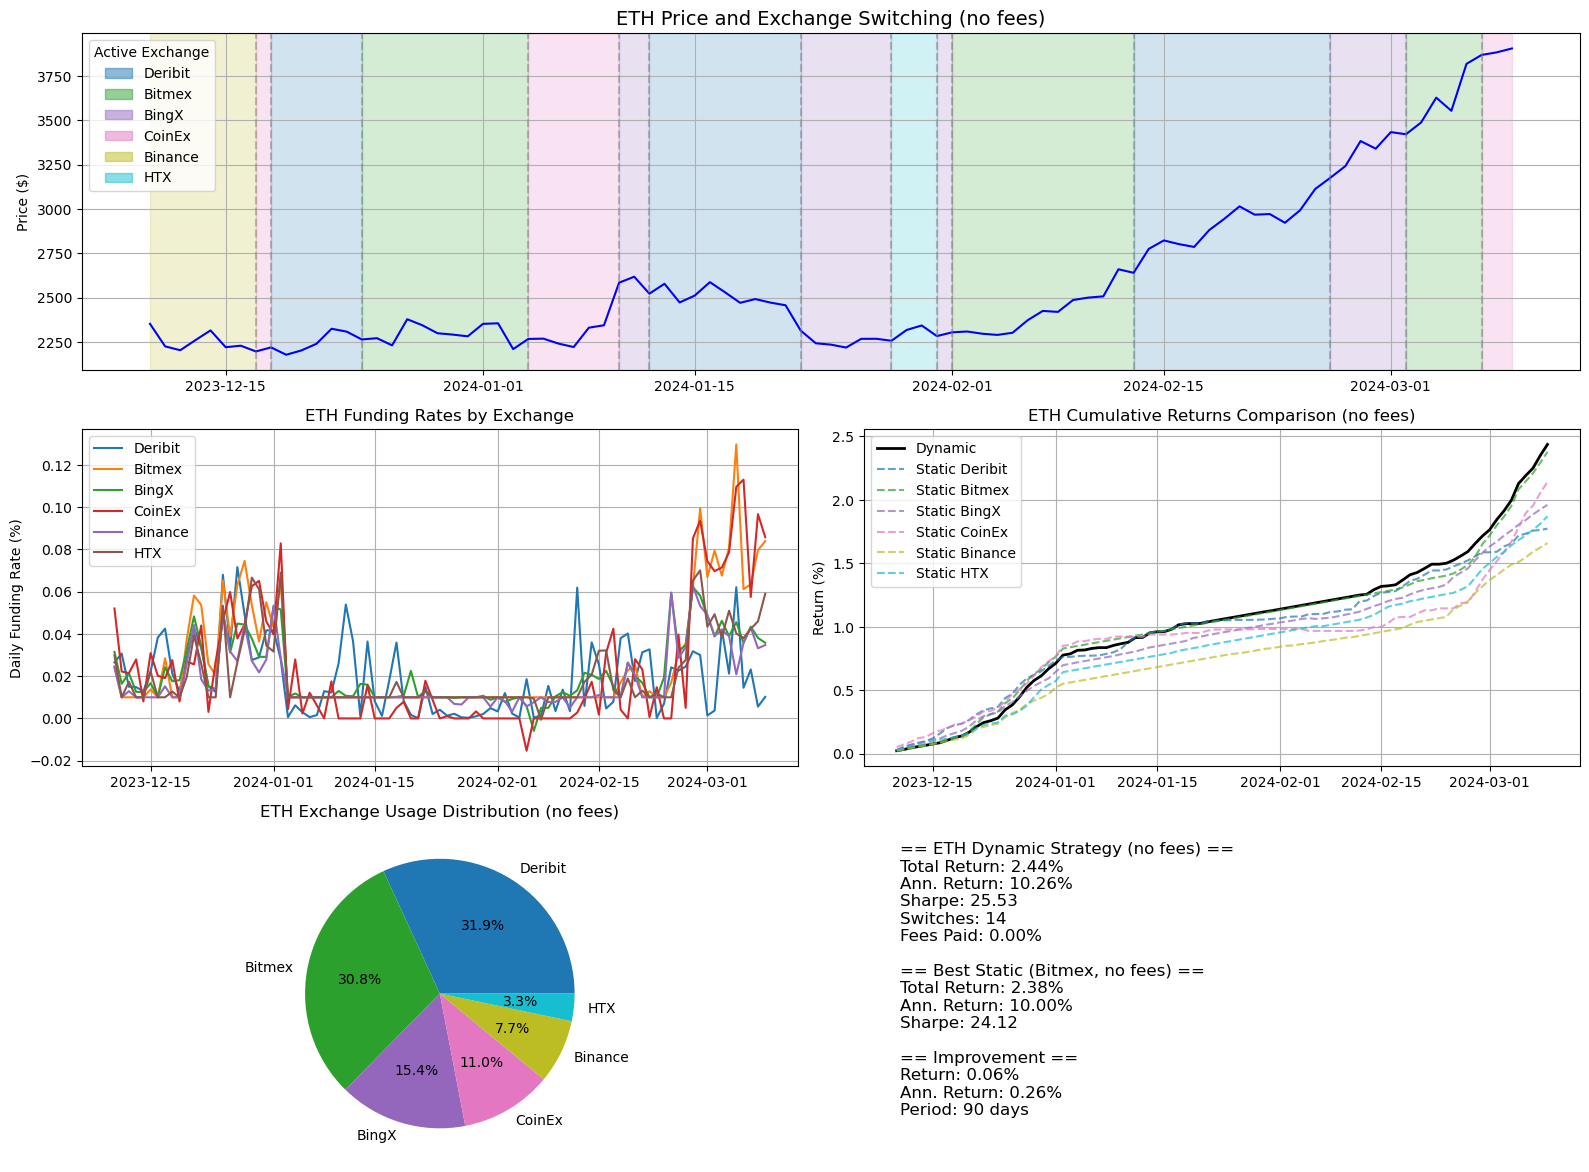

In [8]:
from src.data.get_full_data_coinglass import analyze_multi_exchange_carry_trade, load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2



# Example usage
spot_file_path = 'data/concat/spots_data_2023-12-10_to_2024-03-10.csv'
futures_file_path = 'data/concat/futures_data_2023-12-10_to_2024-03-10.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis
btc_venue_result = analyze_multi_exchange_carry_trade(
    spot_df=btc_spot_df,
    futures_df=btc_futures_df,
    maker_fee=0.0,  # 0.02%
    taker_fee=0.0,   # 0.05%
    title="BTC"
)

# For ETH analysis
eth_venue_result = analyze_multi_exchange_carry_trade(
    spot_df=eth_spot_df,
    futures_df=eth_futures_df,
    maker_fee=0.0,  # 0.02%
    taker_fee=0.0,   # 0.05%
    title="ETH"
)
